In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime

import sys
sys.path.append('..')
import afml.sampling as sampling
import afml.etftrick as etftrick

In [3]:
ESU13 = pd.read_csv('../data/ESU13.csv')
ESZ13 = pd.read_csv('../data/ESZ13.csv')

In [4]:
ESU13.head()

,symbol,time,price,volume
0,ESU13,2013-09-01 17:00:00.083,1640.25,8
1,ESU13,2013-09-01 17:00:00.083,1640.25,1
2,ESU13,2013-09-01 17:00:00.083,1640.25,2
3,ESU13,2013-09-01 17:00:00.083,1640.25,1
4,ESU13,2013-09-01 17:00:00.083,1640.25,1


In [5]:
ESU13['time'] = pd.to_datetime(ESU13['time'], format='%Y-%m-%d %H:%M:%S.%f')
ESZ13['time'] = pd.to_datetime(ESZ13['time'], format='%Y-%m-%d %H:%M:%S.%f')

In [6]:
ESU13_hourly = sampling.time_bars_sampling(ESU13, '60Min')
ESU13_hourly['symbol'] = 'ESU13'
ESZ13_hourly = sampling.time_bars_sampling(ESZ13, '60Min')
ESZ13_hourly['symbol'] = 'ESZ13'

In [7]:
ESU13_hourly.tail()

,time,open,high,low,close,volume,vwap,duration,ticks,symbol
205,2013-09-12 12:59:58.248,1684.50,1687.50,1684.00,1685.75,60716,1686.079398,3597.985,18368,ESU13
206,2013-09-12 13:59:59.043,1685.75,1686.75,1683.75,1686.75,75534,1685.559119,3598.977,19704,ESU13
207,2013-09-12 14:59:59.969,1686.75,1686.75,1681.25,1683.75,160123,1683.392967,3599.957,33545,ESU13
208,2013-09-12 15:59:48.261,1683.75,1685.75,1683.50,1685.25,64700,1684.556642,3588.247,9395,ESU13
209,2013-09-12 16:14:58.709,1685.50,1685.75,1684.75,1685.50,2284,1685.260617,866.501,461,ESU13


In [8]:
ESZ13_hourly.head()

,time,open,high,low,close,volume,vwap,duration,ticks,symbol
0,2013-09-12 17:59:10.446,1678.25,1679.50,1678.00,1679.00,1286,1678.702566,3550.422,388,ESZ13
1,2013-09-12 18:59:36.461,1679.00,1679.25,1678.25,1679.00,383,1678.812663,3459.946,170,ESZ13
2,2013-09-12 19:59:59.783,1679.00,1680.75,1679.00,1680.25,3620,1680.039917,3599.457,1123,ESZ13
3,2013-09-12 20:59:02.333,1680.25,1680.25,1679.00,1679.50,2977,1679.709103,3542.061,1101,ESZ13
4,2013-09-12 21:59:49.309,1679.50,1679.75,1678.25,1678.75,2261,1678.825851,3577.398,600,ESZ13


In [12]:
ES_roll = pd.concat([ESU13_hourly, ESZ13_hourly], axis=0).reset_index()
etf = etftrick.FuturesRollETFTrick(ES_roll)

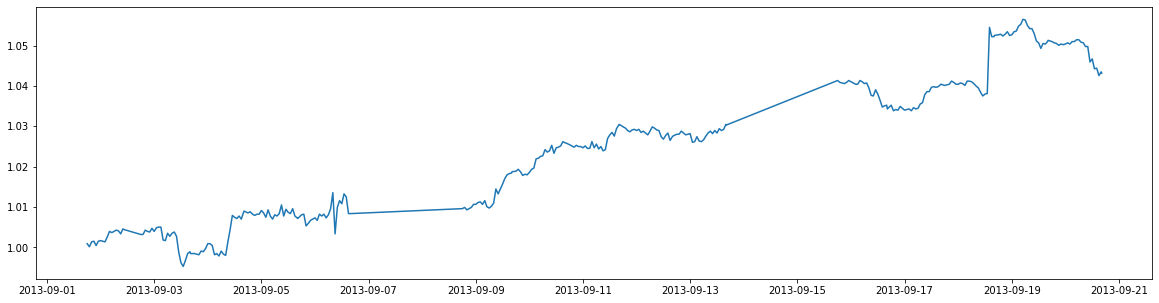

In [13]:
plt.figure(figsize=(20,5))
plt.plot(ES_roll.loc[etf.series.index, 'time'], etf.series)
plt.show()